# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

 ### Solution 1: 
 This study considers real data collected from a Portuguese retail bank, from May 2008 to June 2013, in total of **52944** phone contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

### Solution 2:

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [169]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [170]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Solution 3: 
* Based on the description 'duration' can be discarded as stated for realistic predictive model

* Categorical values need to be converted to numerical values, label encoding could be used

* Scaling can be applied to numerical values

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Solution 4: 
Predict the success of telemarketing calls for selling bank long-term deposits.

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Data cleaning and preparation

#### Check and remove missing values if any

In [172]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


#### Check and remove duplicate values if any

In [173]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)


# Remove duplicate rows if any
df = df.drop_duplicates()

Number of duplicate rows: 12


#### Convert target variable 'y' to binary numeric values

In [174]:
# Convert target variable 'y' to binary numeric values
df['y'] = df['y'].map({'yes': 1, 'no': 0})

#### Convert categorical features to numerical using label encoders

In [175]:
label_encoders = {}

# Convert categorical features to numerical
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])
    label_encoders[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the mappings
for col, mapping in label_encoders.items():
    print(f"Column: {col}")
    for original, encoded in mapping.items():
        print(f"  {original} -> {encoded}")

Column: job
  admin. -> 0
  blue-collar -> 1
  entrepreneur -> 2
  housemaid -> 3
  management -> 4
  retired -> 5
  self-employed -> 6
  services -> 7
  student -> 8
  technician -> 9
  unemployed -> 10
  unknown -> 11
Column: marital
  divorced -> 0
  married -> 1
  single -> 2
  unknown -> 3
Column: education
  basic.4y -> 0
  basic.6y -> 1
  basic.9y -> 2
  high.school -> 3
  illiterate -> 4
  professional.course -> 5
  university.degree -> 6
  unknown -> 7
Column: default
  no -> 0
  unknown -> 1
  yes -> 2
Column: housing
  no -> 0
  unknown -> 1
  yes -> 2
Column: loan
  no -> 0
  unknown -> 1
  yes -> 2
Column: contact
  cellular -> 0
  telephone -> 1
Column: month
  apr -> 0
  aug -> 1
  dec -> 2
  jul -> 3
  jun -> 4
  mar -> 5
  may -> 6
  nov -> 7
  oct -> 8
  sep -> 9
Column: day_of_week
  fri -> 0
  mon -> 1
  thu -> 2
  tue -> 3
  wed -> 4
Column: poutcome
  failure -> 0
  nonexistent -> 1
  success -> 2


### Exploratory Data Analysis (EDA)

In [176]:
# Display unique values for categorical columns to check for inconsistencies
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}:\n", df[col].unique())
    

#### Distribution of target variable
We can observe the target variable is not balanced, there are significantly less clients who subscribed to term deposits

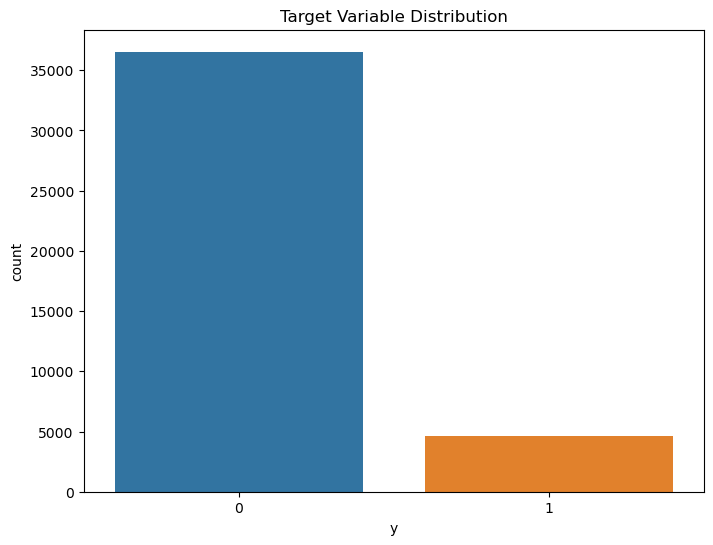

In [177]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df)
plt.title('Target Variable Distribution')
plt.show()


#### Distribution of features

- age - There are more clients over the age of 25 and under 40
- job - Top three job categories are   admin. -> 0, blue-collar -> 1 and technician -> 9
- marital - More clients are  married -> 1 and single -> 2
- education - Majority of clients have university.degree -> 6 followed by high.school -> 3
- default - Most of the clients don't have defaults no -> 0
- housing - More clients have housing loans  yes -> 2 no -> 0
- loan - Majority of clients don't have a loan no -> 0, yes -> 2
- contact - Most clients prefer cellular mode of contact cellular -> 0, telephone -> 1
- month - Last contact month for most clients is month of  may -> 6
- day_of_week - Last contact day seems to be evenly distributed across the week
- duration - Lot of clients have contact duration of 0 seconds
- campaign - High number of contacts during campaign seems to be limited around one or two
- pdays - Most clients have not been contacted since last campaign
- previous - Number of previous contacts made before this campaign is zero for most clients
- poutcome - Outcome of previous contact is non-existent for most contacts

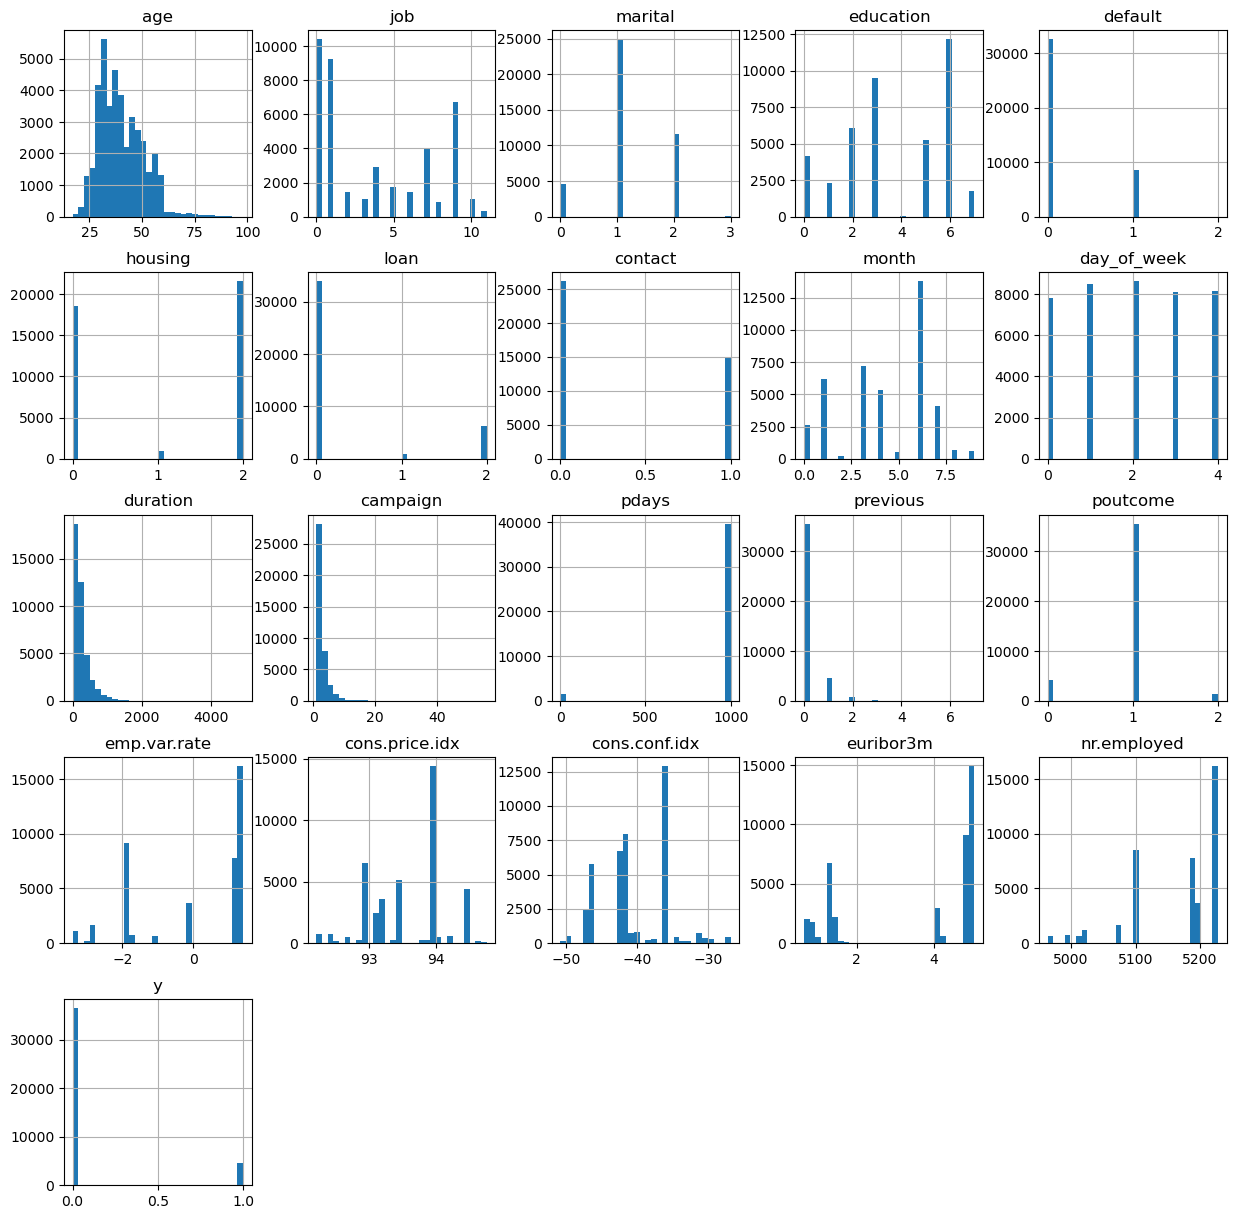

In [178]:
# Distribution of features
df.hist(bins=30, figsize=(15, 15))
plt.show()

#### Correlation matrix
- Target variable y is highly correlated to the call duration
- Features like nr.employed, euribor3m, pdays are negatively correlated to target varable y

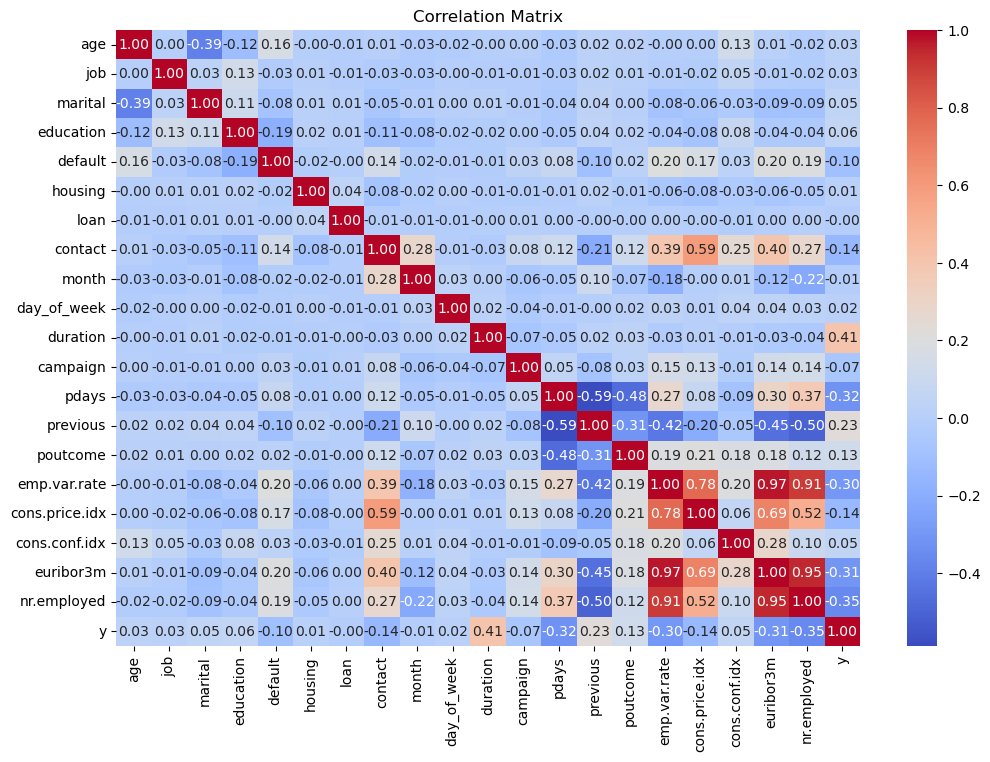

In [179]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

### Solution 5:

Prior to visualization following were completed
* Target variable converted to binary Yes=1, No=0
* Categorical features converted to numeric using label encoding


Other changes follows

##### Remove features with high concentration of a single value, it may have limited predictive power e.g. pdays, poutcome and previous

In [180]:
df = df.drop(columns=['pdays', 'poutcome','previous'])

##### As recommended contact 'duration' can be discarded if the intention is to have a realistic predictive model, this is not known aprior

In [181]:
df = df.drop(columns=['duration'])

In [197]:
print (df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


##### Scale numerical features

In [182]:
# Scaling numerical features
scaler = StandardScaler()
num_cols = ['campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df[num_cols] = scaler.fit_transform(df[num_cols])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

### Solution 6:

In [183]:
# Split the data into features and target
X = df.drop('y', axis=1)
y = df['y']


In [184]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Solution 7:

#### DummyClassifier as a baseline

In [185]:
# DummyClassifier as a baseline
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)
print("Dummy Classifier (Most Frequent) Accuracy:", accuracy_score(y_test, y_pred_dummy))
print("Classification Report:\n", classification_report(y_test, y_pred_dummy))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dummy))


Dummy Classifier (Most Frequent) Accuracy: 0.8821029626032054
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      7265
           1       0.00      0.00      0.00       971

    accuracy                           0.88      8236
   macro avg       0.44      0.50      0.47      8236
weighted avg       0.78      0.88      0.83      8236

Confusion Matrix:
 [[7265    0]
 [ 971    0]]


/Users/manik/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manik/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manik/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Solution 8:
Refer to problem 10, Logistic regresssion is also included to build basic model

#### Baseline Logistic Regression 

In [186]:
# Refer to Problem 10, includes Logistic Regression with default settings

### Problem 9: Score the Model

What is the accuracy of your model?

### Solution 9: 
Refer to Problem 10, includes Logistic Regression with default settings

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### Solution 10:

#### Define default models for LogisticRegression, KNN, SVC and DecisionTree

In [187]:
default_models = {
    "Logistic Regression":LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),        
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

#### Function to evaluate models, training time, train and test accuracy

In [188]:
def evaluateModels(models):
   results = {}
   # Train and evaluate the models
   for model_name, model in models.items():
      # Measure training time
      start_time = time.time()
      model.fit(X_train, y_train)
      end_time = time.time()
      y_pred_train = model.predict(X_train)
      y_pred_test = model.predict(X_test)

      # Evaluate the model
      accuracy_train = accuracy_score(y_train, y_pred_train)
      accuracy_test = accuracy_score(y_test, y_pred_test)

        
      # Store the results
      results[model_name] = {
        'Train Time': end_time - start_time,
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test,
      }

   # Display the results
   results_df = pd.DataFrame(results).T
   print(results_df)


### Evaluate default models

In [189]:
evaluateModels(default_models)

/Users/manik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                        Train Time  Train Accuracy  Test Accuracy
Logistic Regression       0.334670        0.893018       0.885867
K-Nearest Neighbors       0.010570        0.909624       0.876761
Support Vector Machine   29.154650        0.888646       0.882103
Decision Tree             0.162148        0.992471       0.835236


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Solution 11:

There is no gender feature in the dataset

### Hyperparameter tuning and grid search

#### Define parameter grids for each model

In [190]:
# Define parameter grids for each model
param_grids = {
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10]
    },
    "Logistic Regression": {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear'],
        'max_iter': [500,1000,2000], 
        'tol': [1e-4, 1e-3, 1e-2], 
        'penalty':['l1','l2']
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear','rbf'],
   }

}

#### Grid search with Cross-Validation

In [191]:
# Perform Grid Search with Cross-Validation
best_models = {}
for model_name, model in default_models.items():
    print(f"\nPerforming Grid Search for {model_name}")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")



Performing Grid Search for Logistic Regression


Best parameters for Logistic Regression: {'C': 100, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}
Best cross-validation score for Logistic Regression: 0.8938069216757741

Performing Grid Search for K-Nearest Neighbors
Best parameters for K-Nearest Neighbors: {'n_neighbors': 9, 'weights': 'uniform'}
Best cross-validation score for K-Nearest Neighbors: 0.8879781420765027

Performing Grid Search for Support Vector Machine
Best parameters for Support Vector Machine: {'C': 100, 'kernel': 'rbf'}
Best cross-validation score for Support Vector Machine: 0.8913175470552519

Performing Grid Search for Decision Tree
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation score for Decision Tree: 0.8928658166363086


#### Evaluate the best models obtained from grid search

From the best model results, we can observe Logistic Regression shows good balance between training time and Test Accuracy. Further this model is more interpretable, we will use this to identifiy the features influencing the classification.

In [192]:
evaluateModels(best_models)

                        Train Time  Train Accuracy  Test Accuracy
Logistic Regression       0.184656        0.892805       0.887081
K-Nearest Neighbors       0.006792        0.901943       0.880282
Support Vector Machine  150.096207        0.891925       0.885138
Decision Tree             0.097408        0.908834       0.885746


### Identify important features
We will use coefficients from best logistic regression model to identify important features


In [193]:
# Get the best logistic regression model
lr_model = best_models["Logistic Regression"]
lr_coefficients = lr_model.coef_[0]
lr_features = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_coefficients}).sort_values(by='Coefficient', ascending=False)

### Logistic regression coefficients
**Positive Coefficients** Indicate that as the feature value increases, the odds of the target outcome occurring increases. 
Top three positive coefficients cons.price.idx, euribor3m, cons.confi.idx  

**Negative Coefficients** Indicate that as the feature value increases, the odds of the target outcome occurring decreases. 
Top three negative coefficients emp.var.rate, contact, nr.employed

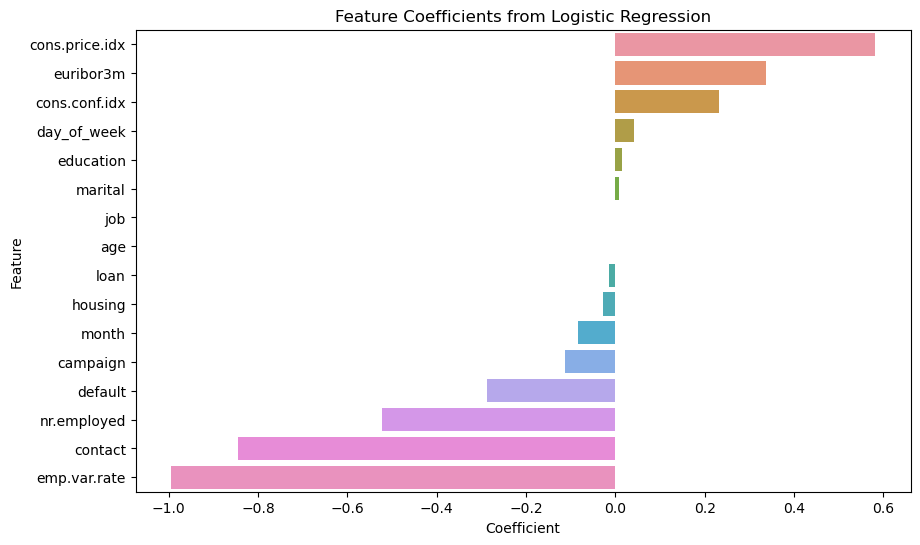

In [194]:
# Plot Coefficients for Logistic Regression
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lr_features)
plt.title('Feature Coefficients from Logistic Regression')
plt.show()

### Report: Predicting Bank Marketing Campaign Success

#### Overview
This report outlines the process of building and evaluating a predictive model to determine the success of a bank marketing campaign. The goal is to predict whether a client will subscribe to a term deposit based on various attributes.

#### Data Source
The dataset used for this analysis is the Bank Marketing dataset from the UCI Machine Learning Repository. It contains information about various client attributes and their responses to a marketing campaign.

#### Workflow Summary

1. **Data Collection**
   - The dataset was downloaded from UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing)
   - It contains client information such as age, job, marital status, education, and campaign details like previous contacts and outcome of previous campaigns.

2. **Data Cleaning**
   - Duplicate records were removed to ensure data quality.
   
3. **Feature Encoding**
   - Categorical data (e.g., job, marital status) were converted to numerical values using a method called Label Encoding.
   - The target variable, representing whether a client subscribed to a term deposit, was converted to numerical format (1 for "yes" and 0 for "no").
   - This process helps machine learning algorithms to interpret the data correctly.

4. **Data Scaling**
   - Numerical features were standardized to ensure they are on the same scale, improving the performance of certain algorithms.

6. **Data Splitting**
   - The data was split into training (80%) and test (20%) sets to evaluate the model's performance on unseen data.

7. **Model Training and Evaluation**
   - Following machine learning models were trained and evaluated:
     - **Baseline Model**: A dummy classifier was used to establish a baseline performance.
     - **Logistic Regression**
     - **K-Nearest Neighbors (KNN)**
     - **Support Vector Machine (SVM)**
     - **Decision Tree**

8. **Hyperparameter Tuning**
   - Hyperparameters are settings that influence the behavior of a model.
   - Grid Search was used to find the best hyperparameters for each model, enhancing their performance.

#### Results

- **Dummy Classifier (Baseline)**
  - Accuracy: This model simply predicted the most frequent class.
  - Performance: Not very informative but establishes a baseline.

- **Baseline results using defaults for models Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Decision Tree**

                                                Train Time  Train Accuracy  Test Accuracy
                        Logistic Regression       0.334670        0.893018       0.885867
                        K-Nearest Neighbors       0.010570        0.909624       0.876761
                        Support Vector Machine   29.154650        0.888646       0.882103
                        Decision Tree             0.162148        0.992471       0.835236

- **Best model results using hyperparameter tuning Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Decision Tree**

                                                Train Time  Train Accuracy  Test Accuracy
                        Logistic Regression       0.184656        0.892805       0.887081
                        K-Nearest Neighbors       0.006792        0.901943       0.880282
                        Support Vector Machine  150.096207        0.891925       0.885138
                        Decision Tree             0.097408        0.908834       0.885746

- **Feature coefficients from logistic regression having most influence**
  - cons.price.idx: consumer price index 
  - euribor3m: euribor 3 month rate
  - cons.conf.idx: consumer confidence index 
 

#### Conclusion

The logistic regression model, after hyperparameter tuning, showed the best balance between simplicity, interpretability, and performance with an accuracy of 88.7% on test data. This model can help the bank identify clients more likely to subscribe to a term deposit, optimizing their marketing efforts.

#### Future Work

To further improve the model:
- Explore more advanced feature engineering techniques.
- Utilize ensemble methods like Random Forest or Gradient Boosting.
- Regularly update the model with new data to maintain its accuracy.

By following these steps, the bank can leverage data-driven insights to enhance their marketing strategies and improve client acquisition.